In [1]:
import numpy as np
import matplotlib.pyplot as plt
from est_entro import est_entro_JVHW, est_entro_MLE
%matplotlib inline

def entropy_true(p):
    """computes Shannon entropy H(p) in bits for the input discrete distribution.

    This function returns a scalar entropy when the input distribution p is a
    vector of probability masses, or returns in a row vector the columnwise
    entropies of the input probability matrix p.
    """
    validate_dist(p)
    return -np.log2(p ** p).sum(axis=0)

def validate_dist(p):
    if np.imag(p).any() or np.isinf(p).any() or np.isnan(p).any() or (p < 0).any() or (p > 1).any():
        raise ValueError('The probability elements must be real numbers between 0 and 1.')

    eps = np.finfo(np.double).eps
    if (np.abs(p.sum(axis=0) - 1) > np.sqrt(eps)).any():
        raise ValueError('Sum of the probability elements must equal 1.')

def randsmpl(p, m, n):
    validate_dist(p)

    edges = np.r_[0, p.cumsum()]
    eps = np.finfo(np.double).eps
    if np.abs(edges[-1] - 1) > np.sqrt(eps):
        edges = edges / edges[-1]
    edges[-1] = 1 + eps

    return np.digitize(np.random.rand(m, n), edges)

S = 100, n = 22
S = 194, n = 37
S = 373, n = 63
S = 720, n = 110
S = 1390, n = 193
S = 2683, n = 340
S = 5180, n = 606
S = 10000, n = 1086
S = 19307, n = 1957
S = 37276, n = 3542
S = 71969, n = 6436
S = 138950, n = 11734
S = 268270, n = 21463
S = 517948, n = 39365
S = 1000000, n = 72383


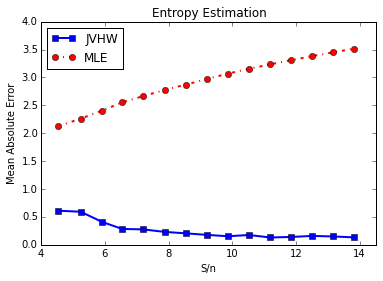

In [2]:
C = 1
num = 15
mc_times = 50  # Total number of Monte-Carlo trials for each alphabet size
record_S = np.ceil(np.logspace(2, 6, num))
record_n = np.ceil(C*record_S/np.log(record_S))

true_S = np.zeros(num)
JVHW_err = np.zeros(num)
MLE_err = np.zeros(num)

twonum = np.random.rand(2, 1)
for i in range(num):
    S = record_S[i]
    n = record_n[i]
    print("S = {0}, n = {1}".format(int(S), int(n)))

    dist = np.random.beta(twonum[0], twonum[1], int(S))
    dist /= dist.sum()

    true_S[i] = entropy_true(dist)
    samp = randsmpl(dist, int(n), mc_times)

    record_JVHW = est_entro_JVHW(samp)
    record_MLE = est_entro_MLE(samp)

    JVHW_err[i] = np.mean(np.abs(record_JVHW - true_S[i]))
    MLE_err[i] = np.mean(np.abs(record_MLE - true_S[i]))

plt.plot(record_S / record_n, JVHW_err, 'b-s', linewidth=2, markerfacecolor='b')
plt.plot(record_S / record_n, MLE_err, 'r-.o', linewidth=2, markerfacecolor='r')
plt.legend(['JVHW', 'MLE'], loc='upper left')
plt.xlabel('S/n')
plt.ylabel('Mean Absolute Error')
plt.title('Entropy Estimation')
plt.xlim(4, 14.5)
plt.show()